In [1]:
# Data Handling
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Preprocessing
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

# Feature Selection
from sklearn.feature_selection import SelectKBest, chi2, f_classif

# ML Models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb

# Evaluation
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    classification_report,
    roc_auc_score,
    roc_curve,
    precision_score,
    recall_score,
    f1_score
)



In [2]:
import pandas as pd

# Define the features programmatically
features = [
    'radius', 'texture', 'perimeter', 'area', 'smoothness',
    'compactness', 'concavity', 'concave_points', 'symmetry', 'fractal_dimension'
]
stats = ['mean', 'se', 'worst']

# Construct full column list
columns = ['id', 'diagnosis'] + [f'{feature}_{stat}' for stat in stats for feature in features]

# Load the data file
df = pd.read_csv('/content/wdbc.data', header=None, names=columns)


In [3]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [5]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave_points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave_points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave_points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave_points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [7]:
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()
df['diagnosis']=label_encoder.fit_transform(df['diagnosis'])

In [19]:
print(label_encoder.classes_)

['B' 'M']


In [14]:
df.sample(5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
443,909777,0,10.57,18.32,66.82,340.9,0.08142,0.04462,0.01993,0.01111,...,10.94,23.31,69.35,366.3,0.09794,0.06542,0.03986,0.02222,0.2699,0.06736
94,862028,1,15.06,19.83,100.30,705.6,0.10390,0.15530,0.17000,0.08815,...,18.23,24.23,123.50,1025.0,0.15510,0.42030,0.52030,0.21150,0.2834,0.08234
415,905686,0,11.89,21.17,76.39,433.8,0.09773,0.08120,0.02555,0.02179,...,13.05,27.21,85.09,522.9,0.14260,0.21870,0.11640,0.08263,0.3075,0.07351
41,855563,1,10.95,21.35,71.90,371.1,0.12270,0.12180,0.10440,0.05669,...,12.84,35.34,87.22,514.0,0.19090,0.26980,0.40230,0.14240,0.2964,0.09606
417,90602302,1,15.50,21.08,102.90,803.1,0.11200,0.15710,0.15220,0.08481,...,23.17,27.65,157.10,1748.0,0.15170,0.40020,0.42110,0.21340,0.3003,0.10480


In [15]:
df.drop(columns=['id'],inplace=True)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.26540,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.18600,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.24300,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.25750,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.16250,0.2364,0.07678
5,1,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.17410,0.3985,0.12440
6,1,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,...,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.19320,0.3063,0.08368
7,1,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,...,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.15560,0.3196,0.11510
8,1,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,...,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.20600,0.4378,0.10720
9,1,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,...,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.22100,0.4366,0.20750


In [20]:
import seaborn as sns

(array([357.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 212.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

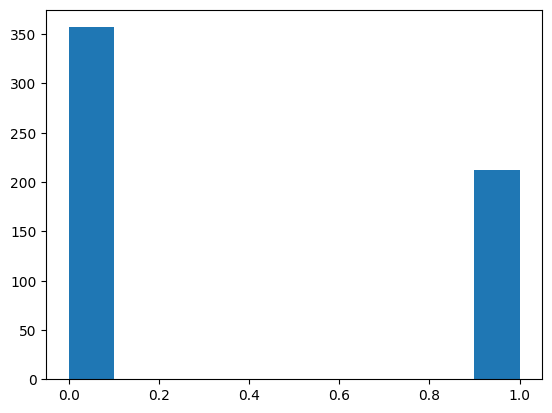

In [26]:
#EDA

plt.hist(df['diagnosis'])

In [29]:
df['radius_mean'].skew()

np.float64(0.9423795716730992)

In [30]:
X=df.drop(columns=['diagnosis'])
y=df['diagnosis']

In [74]:
y.shape

(569,)

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [77]:
y_train.shape

(455,)

In [32]:
X_train

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
68,9.029,17.33,58.79,250.5,0.10660,0.14130,0.31300,0.04375,0.2111,0.08046,...,10.310,22.65,65.50,324.7,0.14820,0.43650,1.25200,0.17500,0.4228,0.11750
181,21.090,26.57,142.70,1311.0,0.11410,0.28320,0.24870,0.14960,0.2395,0.07398,...,26.680,33.48,176.50,2089.0,0.14910,0.75840,0.67800,0.29030,0.4098,0.12840
63,9.173,13.86,59.20,260.9,0.07721,0.08751,0.05988,0.02180,0.2341,0.06963,...,10.010,19.23,65.59,310.1,0.09836,0.16780,0.13970,0.05087,0.3282,0.08490
248,10.650,25.22,68.01,347.0,0.09657,0.07234,0.02379,0.01615,0.1897,0.06329,...,12.250,35.19,77.98,455.7,0.14990,0.13980,0.11250,0.06136,0.3409,0.08147
60,10.170,14.88,64.55,311.9,0.11340,0.08061,0.01084,0.01290,0.2743,0.06960,...,11.020,17.45,69.86,368.6,0.12750,0.09866,0.02168,0.02579,0.3557,0.08020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,8.888,14.64,58.79,244.0,0.09783,0.15310,0.08606,0.02872,0.1902,0.08980,...,9.733,15.67,62.56,284.4,0.12070,0.24360,0.14340,0.04786,0.2254,0.10840
106,11.640,18.33,75.17,412.5,0.11420,0.10170,0.07070,0.03485,0.1801,0.06520,...,13.140,29.26,85.51,521.7,0.16880,0.26600,0.28730,0.12180,0.2806,0.09097
270,14.290,16.82,90.30,632.6,0.06429,0.02675,0.00725,0.00625,0.1508,0.05376,...,14.910,20.65,94.44,684.6,0.08567,0.05036,0.03866,0.03333,0.2458,0.06120
435,13.980,19.62,91.12,599.5,0.10600,0.11330,0.11260,0.06463,0.1669,0.06544,...,17.040,30.80,113.90,869.3,0.16130,0.35680,0.40690,0.18270,0.3179,0.10550


In [33]:
pip install ydata-profiling


  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 400.1/400.1 kB 8.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 17.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 687.8/687.8 kB 26.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.4/105.4 kB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.2/43.2 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 75.4 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=939752a89e268357f27ebdf7af9c8469496617042fff5e864244770afa7bc7e9
  Stored in directory: /root/.cache/pip/wheels/8d/55/1a/19cd535375ed1ede0c996405ebffe34b196d78e2d9545723a2
Successfully built htmlmin


In [34]:
from ydata_profiling import ProfileReport
import pandas as pd

# Load your dataset
df = pd.read_csv('wdbc.data', header=None)

# Create the profile report
profile = ProfileReport(df, title="Breast Cancer Dataset Report", explorative=True)

# Save to an HTML file
profile.to_file("breast_cancer_report.html")


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 32/32 [00:00<00:00, 83.11it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [35]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder


In [38]:
X_train_2=X_train.copy()

In [42]:
sc=StandardScaler()


In [43]:
X_train_scaled = sc.fit_transform(X_train_2)

# Convert to DataFrame to see properly
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train_2.columns)

In [46]:
X_train_scaled_df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
count,4.550000e+02,4.550000e+02,4.550000e+02,4.550000e+02,4.550000e+02,4.550000e+02,4.550000e+02,4.550000e+02,4.550000e+02,4.550000e+02,...,4.550000e+02,4.550000e+02,4.550000e+02,4.550000e+02,4.550000e+02,4.550000e+02,4.550000e+02,4.550000e+02,4.550000e+02,4.550000e+02
mean,-3.162306e-16,-3.513673e-17,-1.132183e-16,3.669836e-16,-2.381489e-16,-4.294489e-17,-5.953723e-17,2.225326e-16,1.444510e-16,5.055785e-16,...,-7.027346e-17,-6.754060e-16,-2.928061e-17,1.815398e-16,-1.561632e-17,-2.249727e-16,-7.612958e-17,-8.198570e-17,5.153387e-16,2.147245e-17
std,1.001101e+00,1.001101e+00,1.001101e+00,1.001101e+00,1.001101e+00,1.001101e+00,1.001101e+00,1.001101e+00,1.001101e+00,1.001101e+00,...,1.001101e+00,1.001101e+00,1.001101e+00,1.001101e+00,1.001101e+00,1.001101e+00,1.001101e+00,1.001101e+00,1.001101e+00,1.001101e+00
min,-1.819583e+00,-2.223500e+00,-1.809497e+00,-1.365036e+00,-3.100011e+00,-1.607228e+00,-1.119899e+00,-1.269910e+00,-2.345430e+00,-1.776889e+00,...,-1.572438e+00,-2.230887e+00,-1.578174e+00,-1.152259e+00,-2.617938e+00,-1.455995e+00,-1.312795e+00,-1.749805e+00,-2.124261e+00,-1.616973e+00
25%,-6.830930e-01,-7.075360e-01,-6.907613e-01,-6.602049e-01,-7.132037e-01,-7.770872e-01,-7.505387e-01,-7.349048e-01,-7.010461e-01,-7.097920e-01,...,-6.616975e-01,-7.412292e-01,-6.853483e-01,-6.358132e-01,-7.430298e-01,-6.961323e-01,-7.555873e-01,-7.700987e-01,-6.499846e-01,-7.189616e-01
50%,-2.314983e-01,-1.185158e-01,-2.429378e-01,-2.895973e-01,-8.082013e-02,-2.413402e-01,-3.446456e-01,-3.911235e-01,-6.915087e-02,-1.772851e-01,...,-2.632354e-01,-5.210786e-02,-2.829543e-01,-3.357508e-01,-2.741590e-02,-2.753858e-01,-2.304110e-01,-2.386392e-01,-1.236838e-01,-2.135847e-01
75%,4.593426e-01,5.631988e-01,4.884799e-01,3.193386e-01,6.331729e-01,5.281282e-01,5.473870e-01,6.737569e-01,5.354290e-01,4.642225e-01,...,4.525400e-01,6.857059e-01,5.263332e-01,2.724862e-01,6.296478e-01,5.738568e-01,5.383496e-01,7.189995e-01,4.319440e-01,4.600643e-01
max,3.961679e+00,4.715674e+00,3.976811e+00,5.208312e+00,4.864642e+00,3.964311e+00,4.256736e+00,4.022271e+00,4.476124e+00,4.815921e+00,...,4.120889e+00,3.962127e+00,4.322305e+00,5.955420e+00,3.767506e+00,4.424833e+00,4.672828e+00,2.709674e+00,5.917679e+00,4.999482e+00


In [37]:
cols=X_train.columns
print(cols)

Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave_points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave_points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave_points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')


In [49]:
skewness={}

In [50]:
for col in cols:
  skewness[col]=X_train[col].skew()

In [51]:
skewness

{'radius_mean': np.float64(0.9764124814982786),
 'texture_mean': np.float64(0.7582533123108947),
 'perimeter_mean': np.float64(1.0249956413151742),
 'area_mean': np.float64(1.7259798370294315),
 'smoothness_mean': np.float64(0.5060811611931281),
 'compactness_mean': np.float64(1.0860312751259784),
 'concavity_mean': np.float64(1.3998236749501731),
 'concave_points_mean': np.float64(1.1767894195047401),
 'symmetry_mean': np.float64(0.7441733906643521),
 'fractal_dimension_mean': np.float64(1.3971176100932097),
 'radius_se': np.float64(3.4021493633825304),
 'texture_se': np.float64(1.7326753718158152),
 'perimeter_se': np.float64(3.760507342984491),
 'area_se': np.float64(5.845101133946188),
 'smoothness_se': np.float64(2.5731777251914534),
 'compactness_se': np.float64(1.9623397685255344),
 'concavity_se': np.float64(5.170263305327809),
 'concave_points_se': np.float64(1.6138783718411924),
 'symmetry_se': np.float64(1.9269223642592885),
 'fractal_dimension_se': np.float64(4.046981239677

In [52]:
skew_left=[key for key,value in skewness.items() if value<0]
skew_right=[key for key,value in skewness.items() if value>0]

In [55]:
skew_right

['radius_mean',
 'texture_mean',
 'perimeter_mean',
 'area_mean',
 'smoothness_mean',
 'compactness_mean',
 'concavity_mean',
 'concave_points_mean',
 'symmetry_mean',
 'fractal_dimension_mean',
 'radius_se',
 'texture_se',
 'perimeter_se',
 'area_se',
 'smoothness_se',
 'compactness_se',
 'concavity_se',
 'concave_points_se',
 'symmetry_se',
 'fractal_dimension_se',
 'radius_worst',
 'texture_worst',
 'perimeter_worst',
 'area_worst',
 'smoothness_worst',
 'compactness_worst',
 'concavity_worst',
 'concave_points_worst',
 'symmetry_worst',
 'fractal_dimension_worst']

In [68]:
from sklearn.preprocessing import PowerTransformer

In [70]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PowerTransformer

# Reset pipeline by creating a new one
transform_pipe = Pipeline([
    ('power', PowerTransformer()),
    ('scaler', StandardScaler())
])


In [108]:
pipe=Pipeline([
    ('preprocess',transform_pipe),
    ('logistic_Regression',LogisticRegression(max_iter=10000,random_state=42))
])


In [109]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('preprocess',
                 Pipeline(steps=[('power', PowerTransformer()),
                                 ('scaler', StandardScaler())])),
                ('logistic_Regression',
                 LogisticRegression(max_iter=10000, random_state=42))])

In [114]:
y_pred=pipe.predict(X_test)

In [116]:
acc=precision_score(y_pred,y_test)
print(acc)

0.9767441860465116


In [119]:
X_train.head(1)

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
68,9.029,17.33,58.79,250.5,0.1066,0.1413,0.313,0.04375,0.2111,0.08046,...,10.31,22.65,65.5,324.7,0.1482,0.4365,1.252,0.175,0.4228,0.1175


In [121]:
cm=confusion_matrix(y_test,y_pred)
print(cm)

[[70  1]
 [ 1 42]]


In [123]:
import pickle
with open('model_pipeline.pkl', 'wb') as file:
    pickle.dump(pipe, file)
